In [5]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import the relevant packages

In [11]:
from weighted_evo import *
from bct import community_louvain

x = GraphEvo(300, 0.05, np.array([2., 0.5, 3, 1.5]))
print(community_louvain(x.G)[1])

0.22408904176099012


This is the code we run to generate the data for the project, sweeping the $p$ and $b$ parameter spaces and running 5 million MC steps at each for 10 different random graphs

In [ ]:
p_vals = np.array([0.02, 0.05, 0.1, 0.15, 0.2, 0.25])
b_vals = np.array([0., 0.5, 1.0, 1.5, 2.0])
for p in p_vals:
    for b in tqdm_notebook(b_vals):
        payoffs = np.array([2., -1.5 + b, 3, -0.5 + b])
        dev_Gs, strategies = parallel_mc(500, p, payoffs, 1., 0.1,
                                         5000000, 10)
        np.save('p_{}_b_{}_dev_Gs.npy'.format(p, b), dev_Gs)
        np.save('p_{}_b_{}_strats.npy'.format(p, b), strategies)

copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done


In [3]:
x.mc_step_incr_edge(1, 0.1)

In [12]:
for _ in tqdm_notebook(range(5000000)):
    x.mc_step_incr_edge(1, 0.1)
C, m = community_louvain(x.G)
print(m)

KeyboardInterrupt: 

In [8]:
import time
start = time.time()
dev_Gs, strategies = parallel_mc(300, 0.05, np.array([2., -1, 3, 0.]),
                                 1., 0.1, 5000000, 10)
end = time.time()
print(end - start)

copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
368.8823218345642


In [17]:
np.save('p_{}_b_{}_dev_Gs.npy'.format(0.02, 0.5), dev_Gs)

(array([249344.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    656.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <a list of 10 Patch objects>)

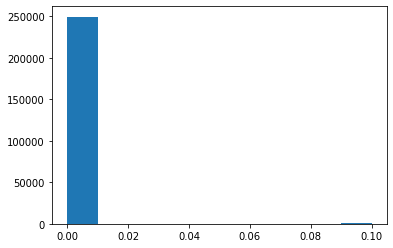

In [523]:
plt.hist(x.G.reshape(-1))

In [531]:
graph, strats = x.run_mc(1, 0.1, 1000000)
C, m = community_louvain(x.G)
print(m)

0.9663977145152013


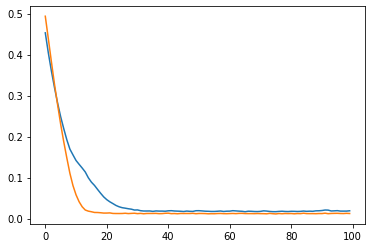

In [532]:
plt.plot(np.mean(strats, axis=1)[::10])

In [503]:
nx.density(G)

0.0036713426853707417

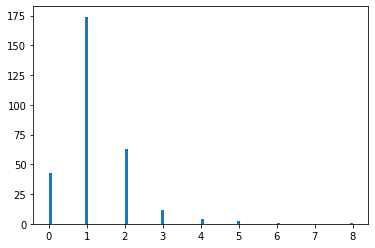

In [13]:
G = nx.from_numpy_array(x.G)
nx.density(G)
plt.hist(dict(G.degree()).values(), bins=100)
plt.show()

In [235]:
G.edges(data=True)

EdgeDataView([(0, 5, {'weight': 8.2}), (0, 7, {'weight': 2.1999999999999997}), (0, 39, {'weight': 1.9999999999999998}), (0, 42, {'weight': 11.099999999999998}), (0, 43, {'weight': 0.8}), (0, 48, {'weight': 2.1}), (0, 67, {'weight': 0.6000000000000001}), (0, 71, {'weight': 5.300000000000001}), (0, 77, {'weight': 0.6000000000000001}), (0, 81, {'weight': 0.8}), (0, 89, {'weight': 2.8000000000000003}), (0, 90, {'weight': 7.1}), (0, 100, {'weight': 8.699999999999998}), (0, 101, {'weight': 13.800000000000002}), (0, 103, {'weight': 13.799999999999994}), (0, 121, {'weight': 0.2}), (0, 123, {'weight': 0.4}), (0, 125, {'weight': 1.2}), (0, 130, {'weight': 0.8}), (0, 142, {'weight': 5.700000000000001}), (0, 144, {'weight': 5.2}), (0, 146, {'weight': 3.6000000000000014}), (0, 148, {'weight': 3.6000000000000014}), (0, 151, {'weight': 5.200000000000001}), (0, 157, {'weight': 4.6000000000000005}), (0, 160, {'weight': 15.299999999999992}), (0, 162, {'weight': 9.6}), (0, 163, {'weight': 1.4}), (0, 197,

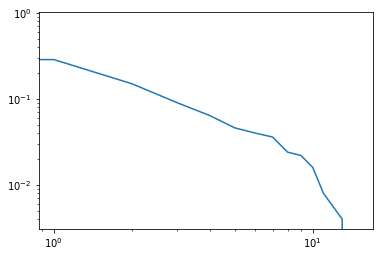

In [505]:
from collections import Counter
c = np.array(sorted(Counter(list(dict(G.degree()).values())).items()))
degs = c[:, 0]
counts = c[:, 1]
cdf = np.cumsum(counts)/np.sum(counts)
ccdf = 1-cdf
plt.loglog(degs, ccdf)


2.3541161129262482
2.0
-2.7139844773776387 0.019478200227529593


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.7/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


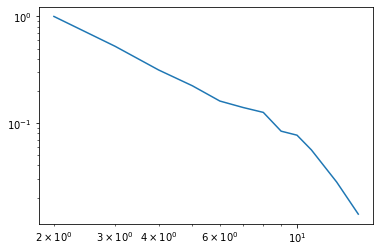

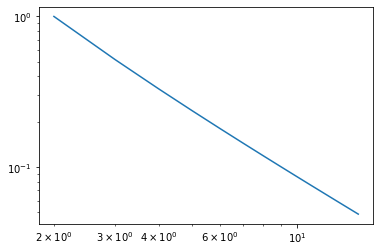

In [506]:
import powerlaw
results = powerlaw.Fit(list(dict(G.degree()).values()), 
                       discrete=True)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R, p)
results.plot_ccdf()
results.power_law.plot_ccdf()

In [168]:
from bct import community_louvain
print(community_louvain(x.G)[1])

0.3972444444444444


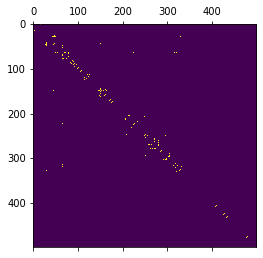

In [507]:
plt.matshow(x.G[:, np.argsort(C)][np.argsort(C), :])

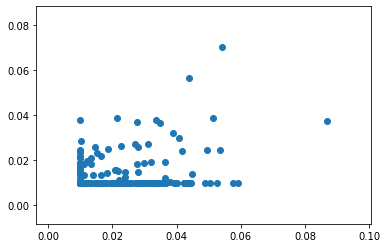

In [15]:
plt.scatter(x.strategies[:, 0], x.strategies[:, 1])

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


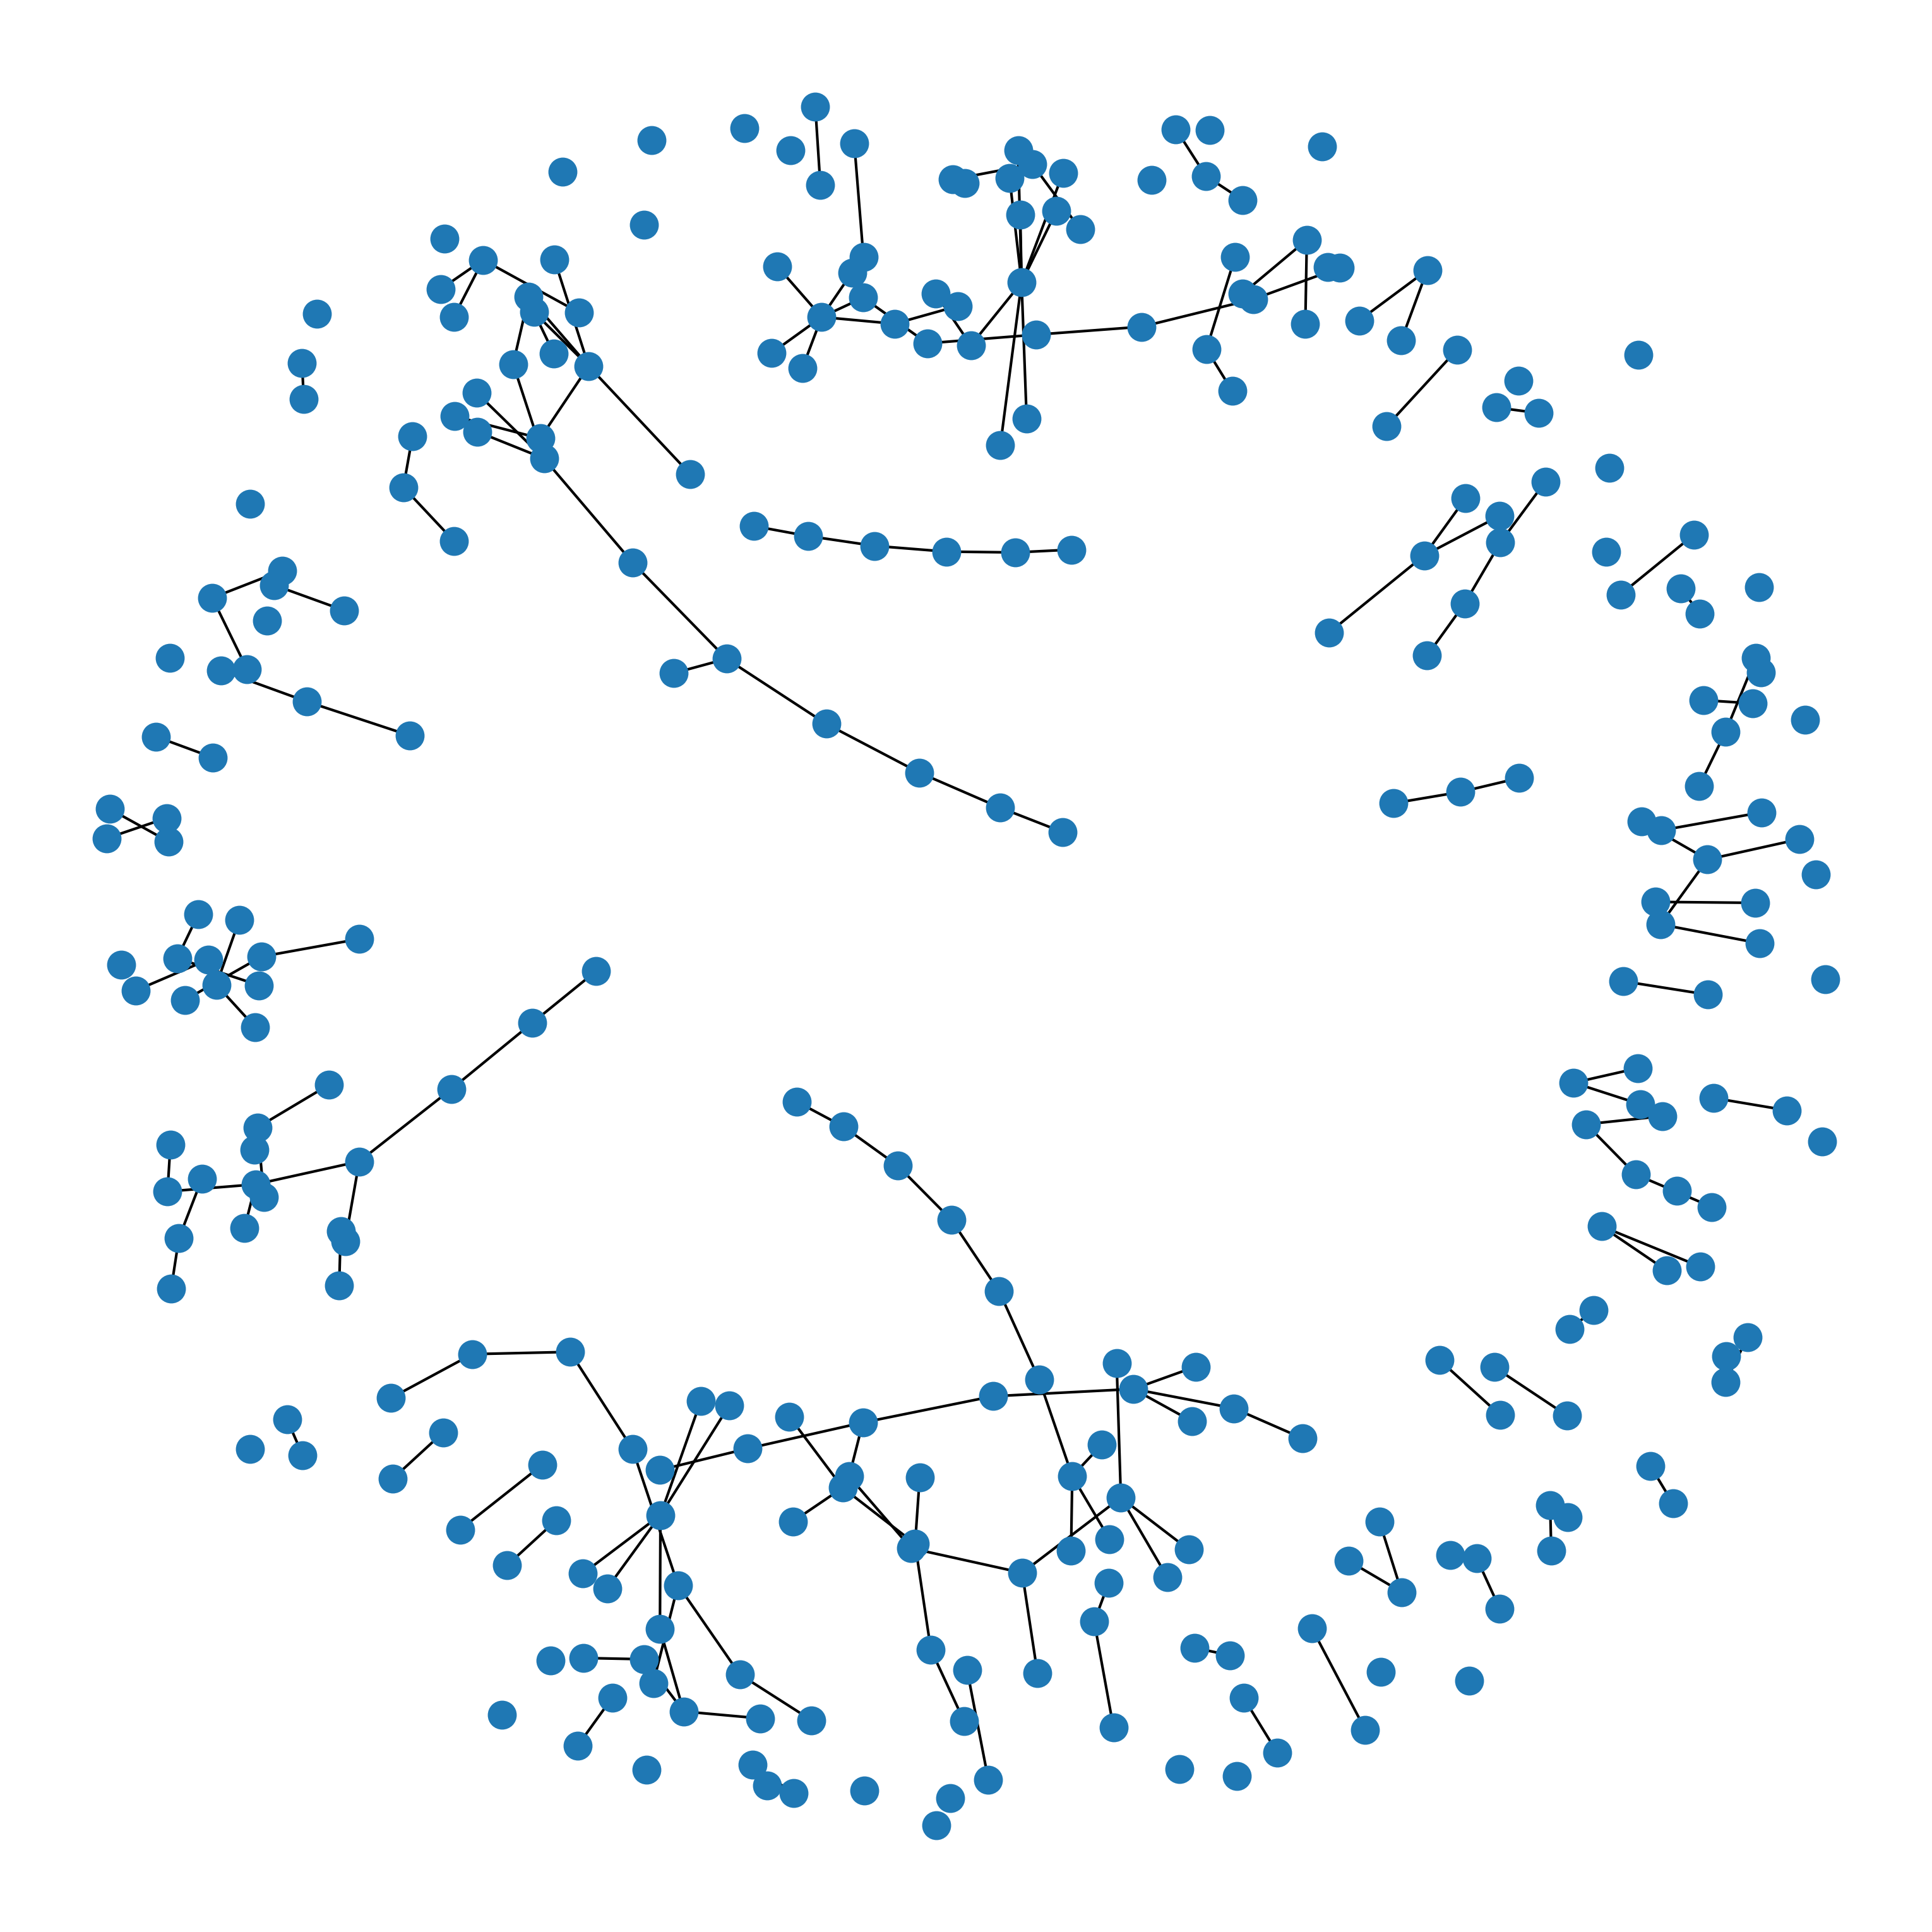

In [14]:
plt.figure(figsize=(10, 10), dpi=300)
nx.draw(G, node_size=100)